## Big Mart Sales

## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


## About the DataSet :
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

|Features|Description|
|-----|-----|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particular store. This is the outcome variable to be predicted.|
|source|is it a train data or test data point|

 

### Load the data

Just to inform you guys that this data is preprocessed with necessary missing value imputation and feature engineering and encoding of features.

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

sales_data = pd.read_csv('./data/sales.csv',index_col=False)

sales_data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,source,Outlet_Years,Item_Fat_Content_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,train,14,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,train,4,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,train,14,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,train,15,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,train,26,0,...,0,1,0,0,0,0,0,0,0,0


### Data preparation 

In [7]:
#Drop the columns which have been converted to different types:
sales_data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Drop unnecessary columns:
sales_data.drop(['source'],axis=1,inplace=True)

In [8]:
sales_data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,4,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.000000,19.20,15,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,26,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
sales_data.shape

(8523, 32)

### Lets try to plot and predict the model by using polynomial features with degree 15?
**Note: The polynomial model takes time to run with all the records, take a subset of rows.**

In [10]:
X = sales_data.iloc[:200, 4:5].values
y = sales_data.iloc[:200, 2].values 
#X = StandardScaler().fit_transform(X)
X = np.sort(X, axis=0)

In [11]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 15) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

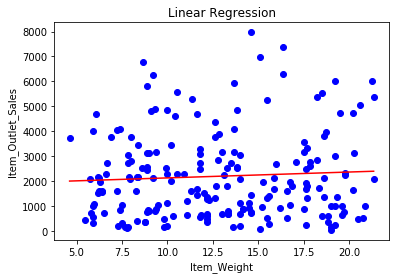

In [13]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Item_Weight') 
plt.ylabel('Item_Outlet_Sales') 
  
plt.show() 

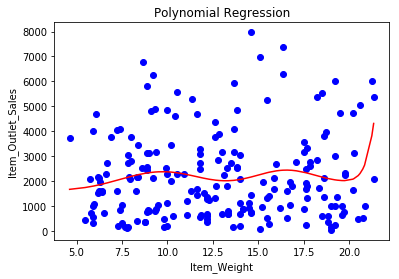

In [14]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Item_Weight') 
plt.ylabel('Item_Outlet_Sales') 
  
plt.show() 

In [15]:
# Predicting a new result with Linear Regression 
x=np.array([[5.75]])
print(lin.predict(x))


# Predicting a new result with Polynomial Regression
x_2=np.array([[5.75]])
x_2=poly.fit_transform(x_2)

print(lin2.predict(x_2))

[2031.71476654]
[1780.23448332]


### Advantages of using Polynomial Regression:
```python
* Broad range of function can be fit under it.
* Polynomial basically fits wide range of curvature.
* Polynomial provides the best approximation of the relationship between dependent and independent variable.
```
### Disadvantages of using Polynomial Regression
```python
* These are too sensitive to the outliers.
* The presence of one or two outliers in the data can seriously affect the results of a nonlinear analysis.
* In addition there are unfortunately fewer model validation tools for the detection of outliers in 
  nonlinear regression than there are for linear regression.
```

### Create a baseline regression model and observe the error measured.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Let's try out to set up a baseline model with just two explanatory variables
X1 = sales_data.loc[:, ['Item_Weight', 'Item_MRP', 'Item_Visibility']]

x_train1, x_cv1, y_train1, y_cv1 = train_test_split(X1, sales_data.Item_Outlet_Sales.values, test_size=0.3, random_state =43)

# Intiating baseline model
alg1 = LinearRegression(normalize=True)
alg1.fit(x_train1, y_train1)

# Predicting on the sample subset 
yhat1 = alg1.predict(x_cv1)

# Calculating error

print('Mean Squared Error is',mean_squared_error(y_cv1, yhat1))

# R-Square

print('R Square Score is ', r2_score(y_cv1, yhat1))

Mean Squared Error is 1949472.2441449496
R Square Score is  0.3372350701376966


### What will happen to R-Square score if you increase the no. of predictors in your model.Use all features for prediction and implement a linear regression model

In [17]:
# Let's try out to set up a baseline model with just two explanatory variables
X2 = sales_data.drop(columns=['Item_Outlet_Sales','Item_Identifier'],axis = 1)

x_train2, x_cv2, y_train2, y_cv2 = train_test_split(X2, sales_data.Item_Outlet_Sales, test_size =0.3, random_state =100)

# Intiating baseline model
alg2 = LinearRegression(normalize=True)
alg2.fit(x_train2, y_train2)

# Predicting on the sample subset 
yhat2 = alg2.predict(x_cv2)

# Calculating error

print('Mean Squared Error is',mean_squared_error(y_cv2, yhat2))


Mean Squared Error is 1270688.2492543263


We saw that addition of `Item_Visibility` variable has caused the mse to further reduced value. There is an increase in the R-square value, does it mean that the addition of `Item_Visibility` is useful for out model.

The only drawback of R2 is that if new predictors (X) are added to our model, R2 only increases or remains constant but it never decreases. We can not judge that by increasing complexity of our model, are we making it more accurate?

That is why, we use “Adjusted R-Square”.



In [18]:
# Implementing adjusted r square 
def adj_r2_score(model,y,yhat):
    from sklearn import metrics
    adj = 1 - float(len(y)-1)/(len(y)-len(model.coef_)-1)*(1 - metrics.r2_score(y,yhat))
    return adj


# Comparing r square and adjusted r square across three models
adj_score_model1 = adj_r2_score(alg1, y_cv1, yhat1)
adj_score_model2 = adj_r2_score(alg2, y_cv2, yhat2)


print('R square {} and adjusted R square {} of model 1 '.format(r2_score(y_cv1, yhat1), adj_score_model1))
print('R square {} and adjusted R square {} of model 2 '.format(r2_score(y_cv2, yhat2), adj_score_model2))

R square 0.3372350701376966 and adjusted R square 0.3364562629345681 of model 1 
R square 0.5520241442198854 and adjusted R square 0.5467037658852048 of model 2 


`Model 2` shows that there is an increment in adjusted  R square while removing the features which means that those features were irrelevant to the model and were not helping to that extent to explain the variance in data.

### Does your model faces the issue of Heteroskedacity. How to detect it ?

Text(0.5, 1.0, 'Residual plot')

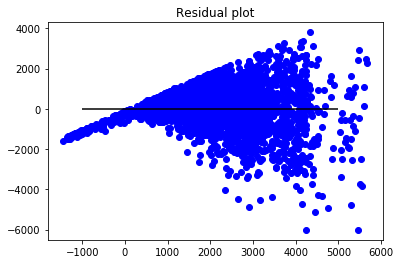

In [19]:
# Lets plot residuals of model 2 

x_plot = plt.scatter(yhat2, (yhat2 - y_cv2), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')



We can see a funnel like shape in the plot. This shape indicates Heteroskedasticity. The presence of non-constant variance in the error terms results in heteroskedasticity. This indicates signs of non linearity in the data which has not been captured by the model.

### Let's have a look at the model coefficients of our model 

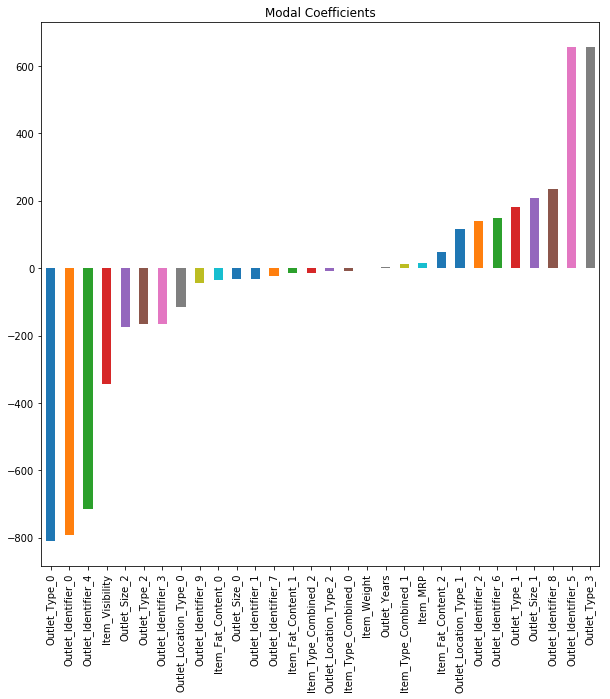

In [20]:
predictors = x_train2.columns

coef = pd.Series(alg2.coef_,predictors).sort_values()

plt.figure(figsize=(10,10))
coef.plot(kind='bar', title='Modal Coefficients')



### How will you deal with non-linearity in your model ?

Hint : Lasso, Ridge and Elastic net regularization might be of some help.

**LASSO REGRESSION**

In [21]:
from sklearn.linear_model import Ridge, Lasso

## training the model
def regularization_ridge(alpha):
    ridgeReg = Ridge(alpha=alpha, normalize=True)

    ridgeReg.fit(x_train2,y_train2)

    yhat_ridge = ridgeReg.predict(x_cv2)
    
    return yhat_ridge, ridgeReg

R square for alpha value 0.01 is 0.5520692381441089
R square for alpha value 0.05 is 0.5515811328640844
R square for alpha value 0.5 is 0.5123447949848055
R square for alpha value 5 is 0.23456585105105976
R square for alpha value 10 is 0.1462374471223905
R square for alpha value 15 is 0.10636885179010602
R square for alpha value 25 is 0.0688882040119484


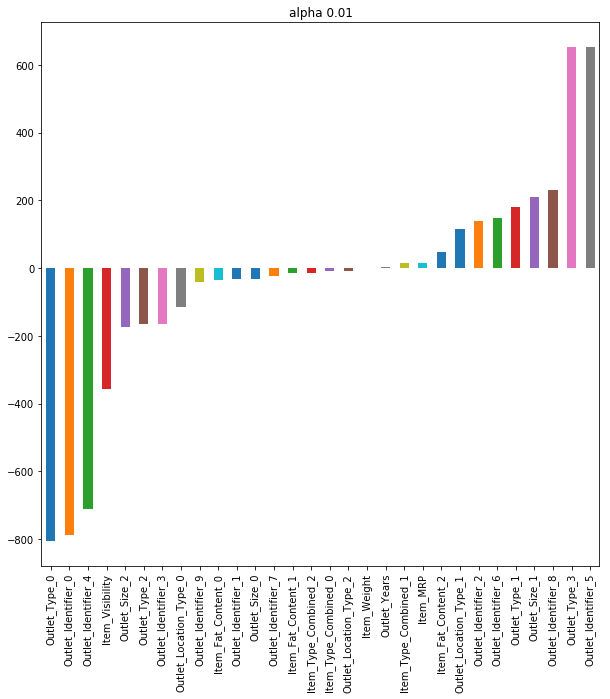

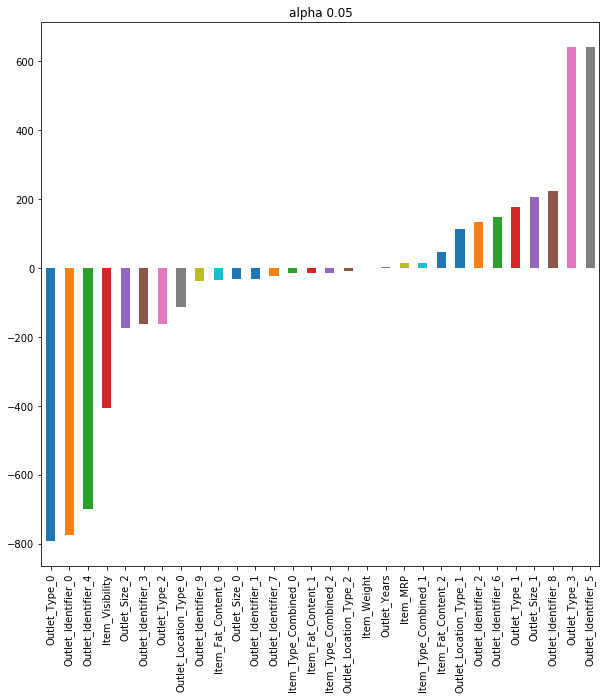

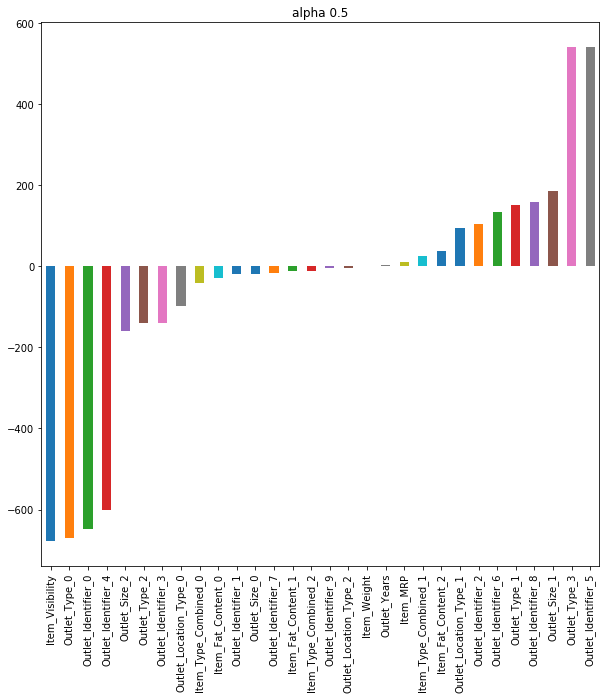

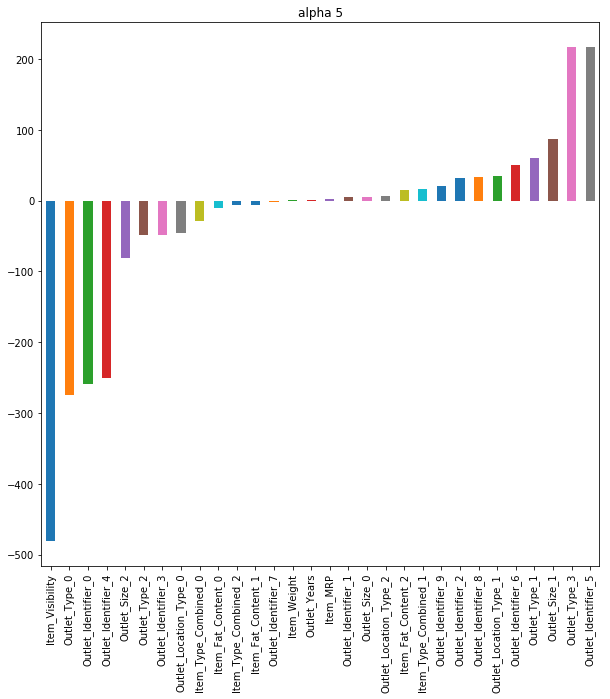

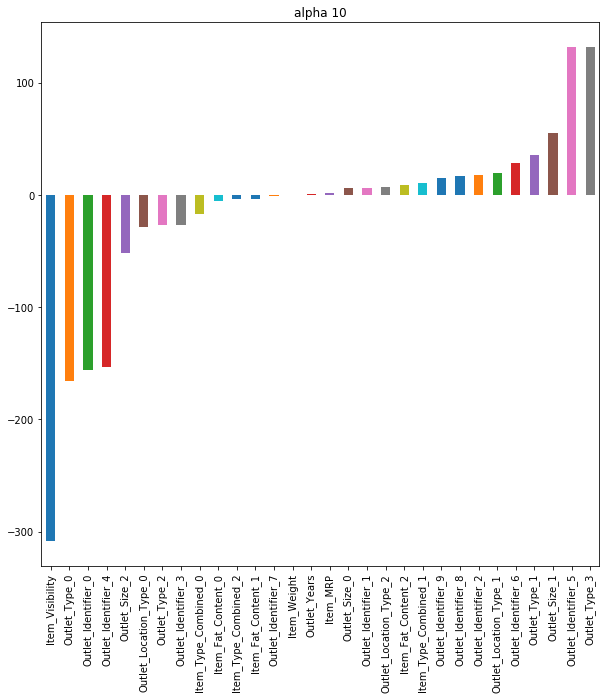

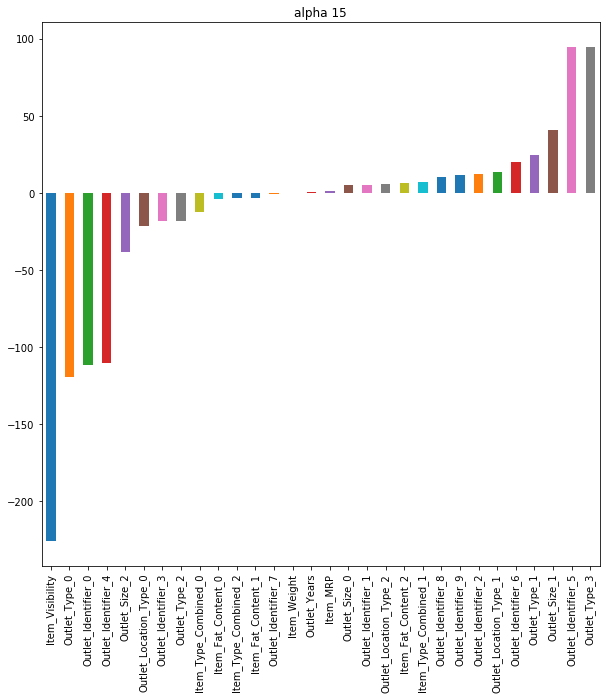

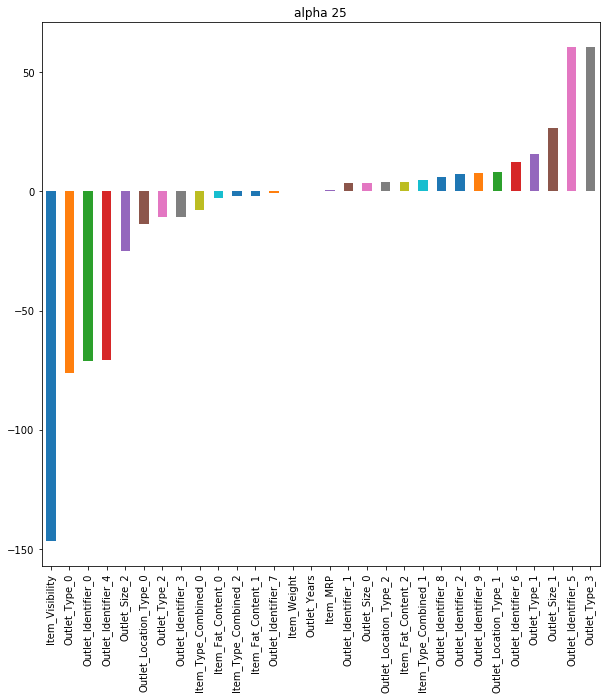

In [22]:
alpha_vals = [0.01, 0.05, 0.5, 5 ,10, 15, 25]
predictors = x_train2.columns


for i in alpha_vals:
    
    pred_ridge, model_ridge = regularization_ridge(i)
    coef = pd.Series(model_ridge.coef_,predictors).sort_values()

    plt.figure(figsize=(10,10))
    coef.plot(kind='bar', title='alpha {}'.format(i))
    
    print('R square for alpha value {} is {}'.format(i,r2_score(y_cv2, pred_ridge)))

- It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
- It reduces the model complexity by coefficient shrinkage.

### Implementing Lasso regression and understanding the differences between the two

In [23]:
alpha_vals_lasso = [0.01, 0.05, 0.5, 5]

def regularization_Lasso(alpha):
    lassoReg = Lasso(alpha=alpha, normalize=True)

    lassoReg.fit(x_train2,y_train2)

    yhat_lasso = lassoReg.predict(x_cv2)
    
    return yhat_lasso, lassoReg

R square for alpha value 0.01 is 0.5520512177194283
R square for alpha value 0.05 is 0.5521091295072923
R square for alpha value 0.5 is 0.5500320178227405
R square for alpha value 5 is 0.41438668257155464


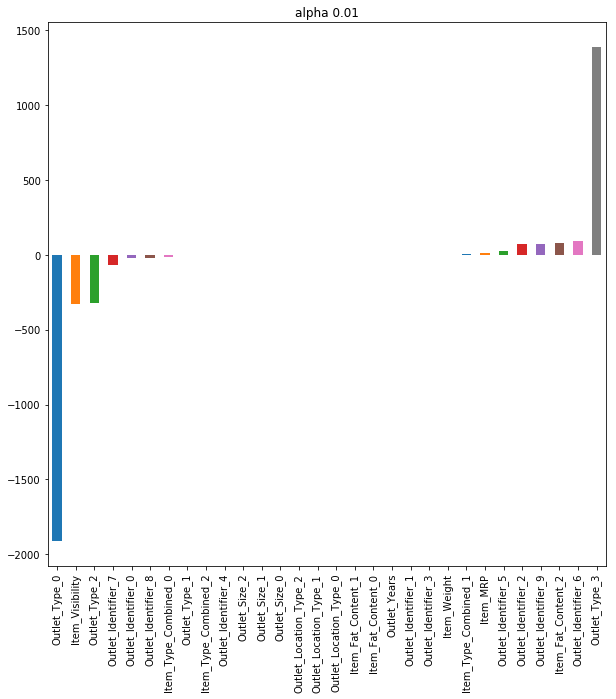

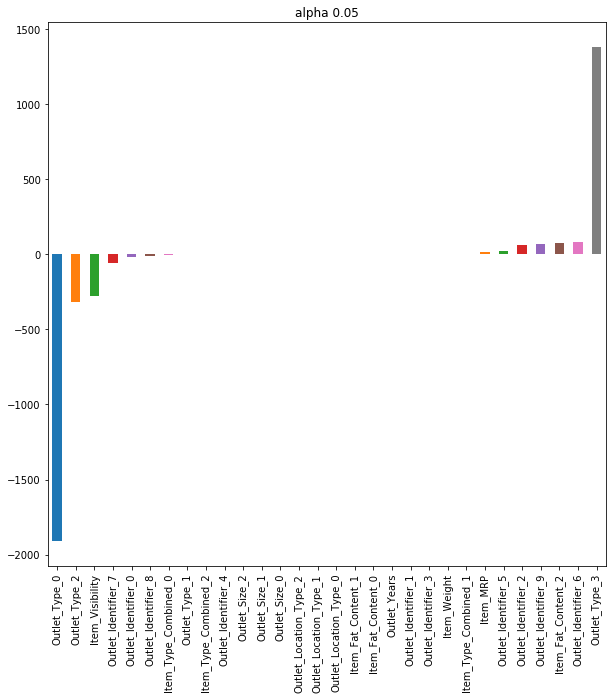

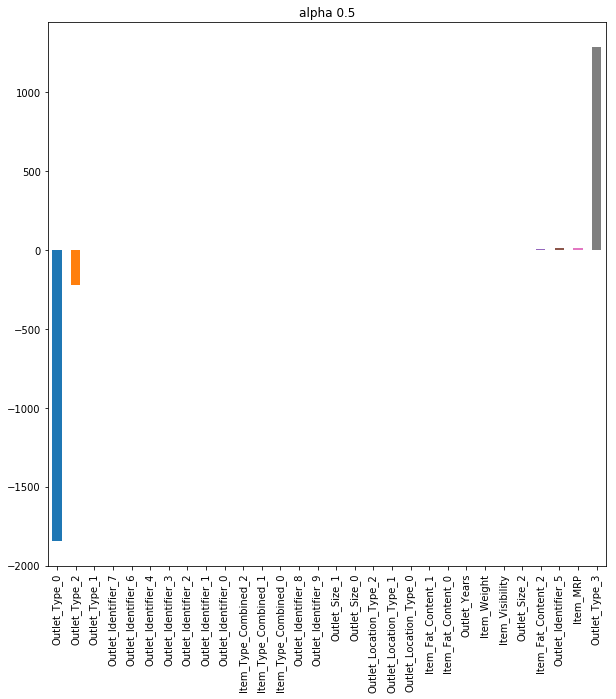

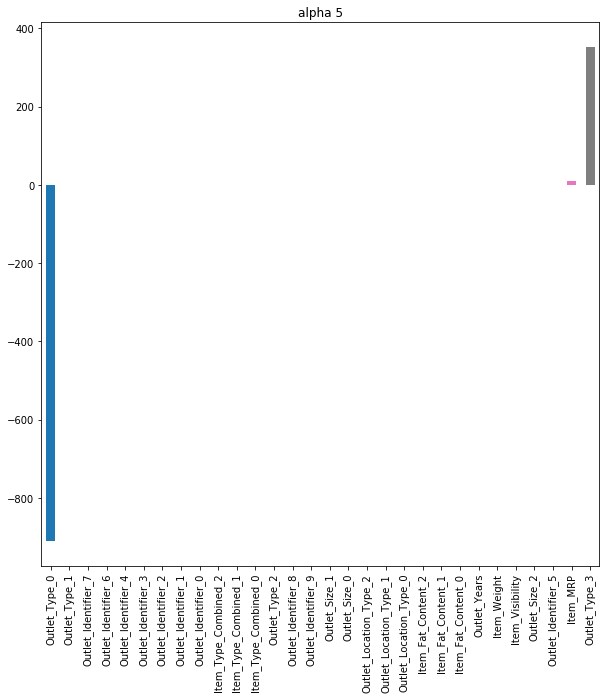

In [24]:
for i in alpha_vals_lasso:
    
    pred_lasso, model_lasso = regularization_Lasso(i)
    coef = pd.Series(model_lasso.coef_,predictors).sort_values()

    plt.figure(figsize=(10,10))
    coef.plot(kind='bar', title='alpha {}'.format(i))
    
    print('R square for alpha value {} is {}'.format(i,r2_score(y_cv2, pred_lasso)))

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

### What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

Hint: Take a look at the concept cross validation.

In [25]:
from sklearn import model_selection
Y = sales_data['Item_Outlet_Sales']
X = sales_data.drop(columns=['Item_Outlet_Sales','Item_Identifier'])
kfold = model_selection.KFold(n_splits=10, random_state=100)

results = model_selection.cross_val_score(Ridge(0.01, normalize=True), X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 56.036% (2.098%)
